# Heat Flow Dynamics in a 1-Dimensional Rod

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from scipy.linalg import eigh

For my final project I chose to do the exercises in Dr. Engelhardt's paper *Heat Flow -- Dynamics of a 1D Rod*.  The paper begins with the two equations that involve heat transfer from an introductory physics course

$$\frac{Q}{\Delta t} = -k_tA\frac{\Delta T^{time}}{\Delta x}$$

$$Q = mc\Delta T $$

which are combined.  In these equations $k_t$ is the thermal conductivity of a material, A is the cross sectional area, $\Delta T^time$ is the change in temperature beween two moments in time, m is the mass, c is the specific heat of the material, and $\frac{\Delta T_{Space}}{\Delta x}$ is the temperature gradient between two points that are separated by a distance $\Delta x$. The first equation describes the rate that energy flows into the system as a function of the temperature difference between the system and its surroundings, and the second equation describes the change in thermal energy of the system.  A system in this case would be a single slice of the rod, to be described below.

Instead of a infinitessimally small differentials, the equations used for this project were solved using a finite difference method. To do so I had to discretize the rod.  


In the cell below I create the rod using 1-dimensional arrays of x-values, and t-values.  Then create a 2-Dimensional array to hold the temperature values for each slice of the rod during each time step.  Finally adding an inital temperature to the entire rod, and heating the first slice as if if was connected to a pan using a hyperbolic tangent function.

In [4]:
#Creating 1D array for x-position
L  = 0.20
Nx = 80
dx  = L/Nx
x = np.linspace(0, L, Nx) 

#Creating 1D array for time
tMax = 600 
Nt = 10000
dt  = tMax/Nt
t = np.linspace(0, tMax, Nt) 

#Creating 2D array for temperature based on x and t
T = np.zeros((Nt,Nx))
T0 = 20
Tstove = 150
T[0,:] = T0
T[:,0] = T0 + Tstove * np.tanh(t/50)

The combination of the first two equations results in 

$$Q = -(\frac{k_tA \Delta t}{\Delta x}) \Delta T_{Space} $$

With $\Delta T_{right} = T_{i+1}-T_i$ and $\Delta T_{Left} = T_i-T_{i-1}$. Then replacing $T_{space}$ with $T_{left}$, we get 

$$Q = Q_{Left} + Q_{Right} $$

Then subsituting in the equation above for Q we get

$$Q = -(\frac{k_tA \Delta t}{\Delta x}) (2T_{i}-T_{i-1}-T_{i+1}) $$

This equation represents the heat flow into one slice of the rod from an adjacent slice. 

Next I created an equation for heat flow during a time interval.  This comes from $\Delta T^{Time} = \frac{Q}{mc}$, and inserting Q in this equation we get

$$ \Delta T_{i}^{Time} = -(\frac{k_tA \Delta t}{mc \Delta x}) (2T_{i}-T_{i-1}-T_{i+1}) $$

Time then must be discretized as well. So I created a 2-Dimensional array with j being time and i being the slice on the rod.

$$ \Delta T_{i}^{j} = T_{i}^{j-1} -(\frac{k_tA \Delta t}{mc \Delta x}) (2T_{i}^{j-1}-T_{i-1}^{j-1}-T_{i+1}^{j-1}) $$

To make the code easier I made a constant $r = \frac{k_t\Delta t}{\rho c(\Delta x)^2}$ and solved to make the equation

$$ \Delta T_{i}^{j} = rT_{i-1}^{j-1} +(1-2r)T_{i}^{j-1}+rT_{i+1}^{j-1} $$

After looping through this equation for the max time I am left with the 2-Dimensional array `T` containing rows that are the timesteps, and columns that are the temperature of each corresponding slice of the rod.  

In [5]:
#Values for Steel
kt = 16
rho = 500
c = 8000

r = kt*dt/(rho*c*dx**2)

for j in range(1, Nt):
    for i in range(1, Nx-1): 
        T[j][i] = r*T[j-1][i-1] + (1 - 2*r)*T[j-1][i] + r*T[j-1][i+1]
    T[j, -1] = r*T[j-1][i-1] + (1 - r)*T[j-1][i] # End of rod

In this cell I graph the position vs temperature.  Each line on the graph is a different time step in the T array.  As time passes the temperature of the entire handle increases.  Eventually the entire handle will be the same temperature as the pan, which is not shown here but could easily be graphed by adding another line that shows the temperature of the handle at the final time step.

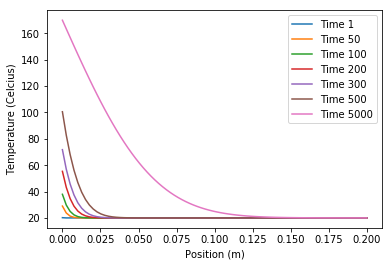

In [7]:
plt.figure()
plt.plot(x,T[1,:], label="Time 1")
plt.plot(x,T[50,:], label="Time 50")
plt.plot(x,T[100,:], label="Time 100")
plt.plot(x,T[500,:], label="Time 500")
plt.plot(x,T[5000,:], label="Time 5000")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (Celcius)")
plt.legend()
plt.show()

Below I created a colored mesh grid that displays the termperature of the handle.  On the y-axis is time, and x-axis is position.  The axis are switched from their normal assigment to give a visual representation that is easier to understand.  As time passes, this plot shows that the first few centimeters of the rod are hot, and almost half of the rod has increased in temperature.  If more time was allowed to pass there more be more red towards the top of the plot, showing that more of the handle was heated. 

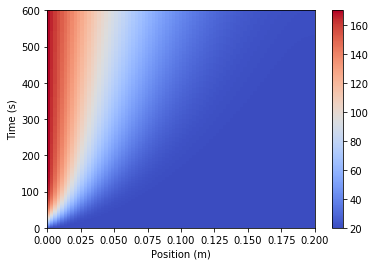

In [39]:
X,Y=np.meshgrid(x,t)
plt.pcolor(X,Y,T,cmap='coolwarm')
plt.ylabel("Time (s)")
plt.xlabel("Position (m)")
plt.colorbar()